In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-aug-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-aug-2021/train.csv
/kaggle/input/tabular-playground-series-aug-2021/test.csv


# Data preparation/EDA

## **Load and visualize dataset**

In [4]:
df_train = pd.read_csv("/kaggle/input/tabular-playground-series-aug-2021/train.csv")
df_test = pd.read_csv("/kaggle/input/tabular-playground-series-aug-2021/test.csv")
sub = pd.read_csv("/kaggle/input/tabular-playground-series-aug-2021/sample_submission.csv")

In [5]:
#Columns/Rows" count
cols, rows = df_train.shape
print("Number of columns: ", cols)
print("Number of rows: ", rows)

Number of columns:  250000
Number of rows:  102


In [6]:
df_train.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,250000.0,124999.500000,72168.927986,0.000000,62499.750000,124999.500000,187499.250000,249999.00000
f0,250000.0,0.511213,0.307884,-0.069273,0.251287,0.514962,0.777323,1.07207
f1,250000.0,51.378476,42.396636,-17.000000,18.000000,41.000000,75.000000,273.00000
f2,250000.0,0.107155,1.322200,-7.895580,-0.611172,0.253815,0.759249,9.76859
f3,250000.0,0.050010,0.792368,-1.475560,-0.719418,0.004099,0.765456,1.68019
...,...,...,...,...,...,...,...,...
f96,250000.0,2.417556,0.892563,-1.131980,1.906718,2.340430,2.910020,5.57604
f97,250000.0,0.537484,0.226589,0.005249,0.359646,0.531348,0.709807,1.10540
f98,250000.0,1.576900,0.646306,-0.646967,1.215810,1.451285,1.901632,4.49262
f99,250000.0,8.048805,5.647368,-0.842397,3.732800,7.182205,10.998550,34.01920


In [8]:
#Check for null values
df_train.isnull().sum().sum()

0

In [9]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,150000.0,324999.500000,43301.414527,250000.000000,287499.750000,324999.500000,362499.250000,399999.00000
f0,150000.0,0.513137,0.307512,-0.064172,0.254897,0.516855,0.778300,1.07221
f1,150000.0,51.612380,42.662212,-17.000000,18.000000,41.000000,76.000000,270.00000
f2,150000.0,0.108166,1.338636,-7.952920,-0.615063,0.253162,0.759430,9.93107
f3,150000.0,0.047793,0.790894,-1.491030,-0.718730,0.003786,0.761793,1.67042
...,...,...,...,...,...,...,...,...
f95,150000.0,1.565588,9.268188,-24.337800,-4.015442,0.811492,6.218857,42.50410
f96,150000.0,2.422223,0.894294,-1.056300,1.910507,2.341185,2.918890,5.58377
f97,150000.0,0.537009,0.226024,0.010615,0.359924,0.530720,0.708449,1.10279
f98,150000.0,1.575402,0.645402,-0.673333,1.216300,1.449735,1.895473,4.47294


In [10]:
# Check for null values at test
df_test.isnull().sum().sum()

0

In [11]:
#Unique values
print("Number of unique values:\n", df_train.nunique())

Number of unique values:
 id      250000
f0      223000
f1         289
f2      232906
f3      225458
         ...  
f96     168844
f97     215966
f98     148285
f99     213501
loss        43
Length: 102, dtype: int64


## **Exploratory Data Analysis**

<AxesSubplot:xlabel='loss', ylabel='Density'>

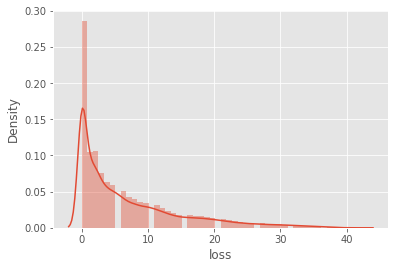

In [12]:
#Loss distribution
sns.distplot(df_train['loss'])

<AxesSubplot:xlabel='loss', ylabel='count'>

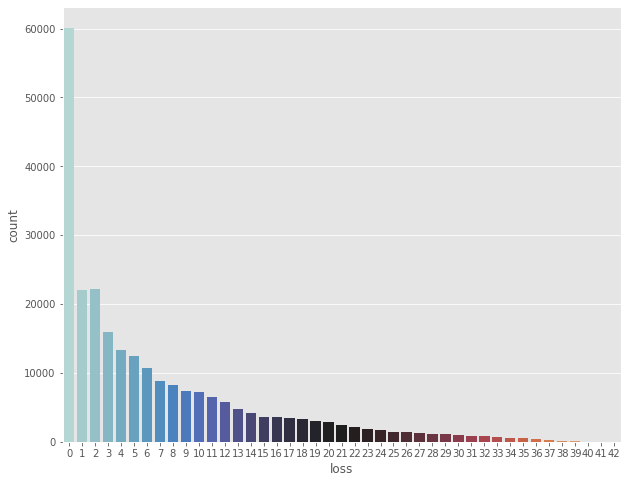

In [14]:
#Countplot of loss
plt.figure(figsize = (10, 8))
sns.countplot(data = df_train, x = 'loss',palette = 'icefire')

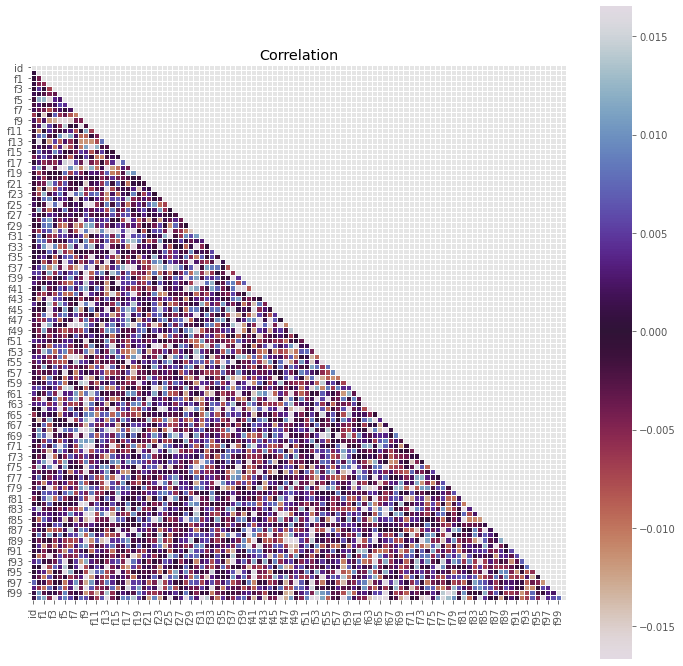

In [15]:
#Correlation matrix
plt.figure(figsize = (12, 12))
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='twilight_r', robust=True, center=0,square=True, linewidths=.6)
plt.title("Correlation")
plt.show()

In [16]:
correlations = df_train.corr()['loss'].sort_values()
print("Lowest correlation features:\n")
print(correlations.head(15), "\n")
print("Highest correlation features:\n")
print(correlations.tail(15))

Lowest correlation features:

f25   -0.030164
f52   -0.026566
f58   -0.023370
f66   -0.022424
f96   -0.020655
f3    -0.018853
f73   -0.014835
f63   -0.013990
f43   -0.013676
f41   -0.013031
f47   -0.012897
f69   -0.012869
f21   -0.012347
f88   -0.012331
f23   -0.012252
Name: loss, dtype: float64 

Highest correlation features:

f18     0.013782
f81     0.013784
f32     0.014113
f84     0.015250
f64     0.015482
f77     0.015697
f65     0.016285
f53     0.016576
f70     0.017387
f31     0.019942
f74     0.021610
f28     0.022780
f46     0.023828
f13     0.025730
loss    1.000000
Name: loss, dtype: float64


Text(0.5, 1.0, 'Features Correlation')

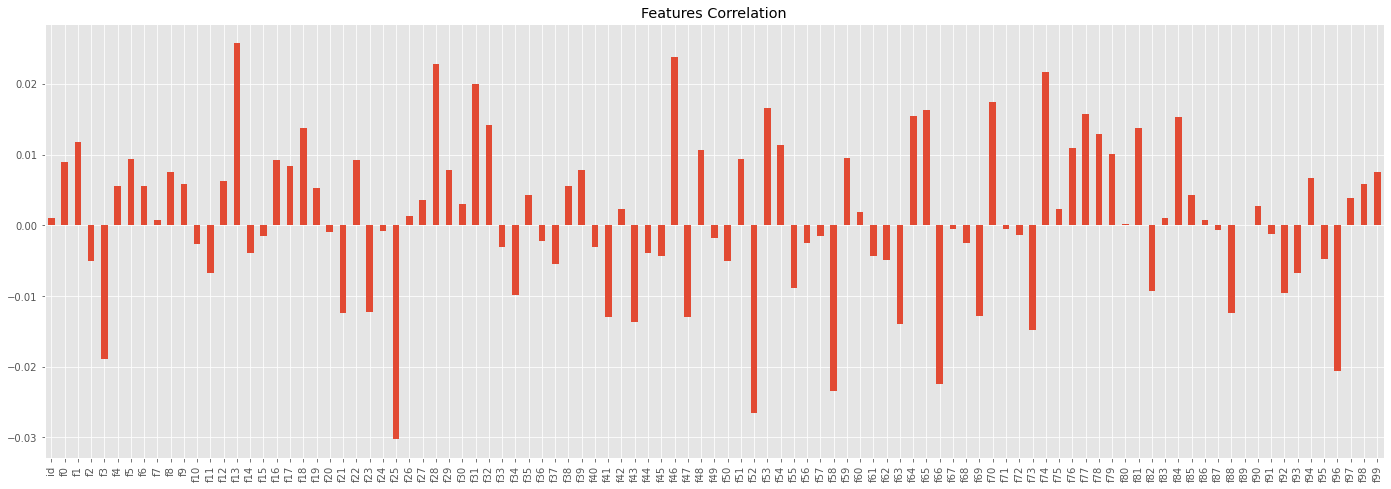

In [33]:
# Plot feature correlations
plt.figure(figsize = (24, 8))
corr["loss"][:-1].plot(kind="bar",grid=True)
plt.title("Features Correlation")

In [34]:
#Drop ID columns
df_train.drop(columns = 'id', inplace = True)
df_test.drop(columns = 'id', inplace = True)

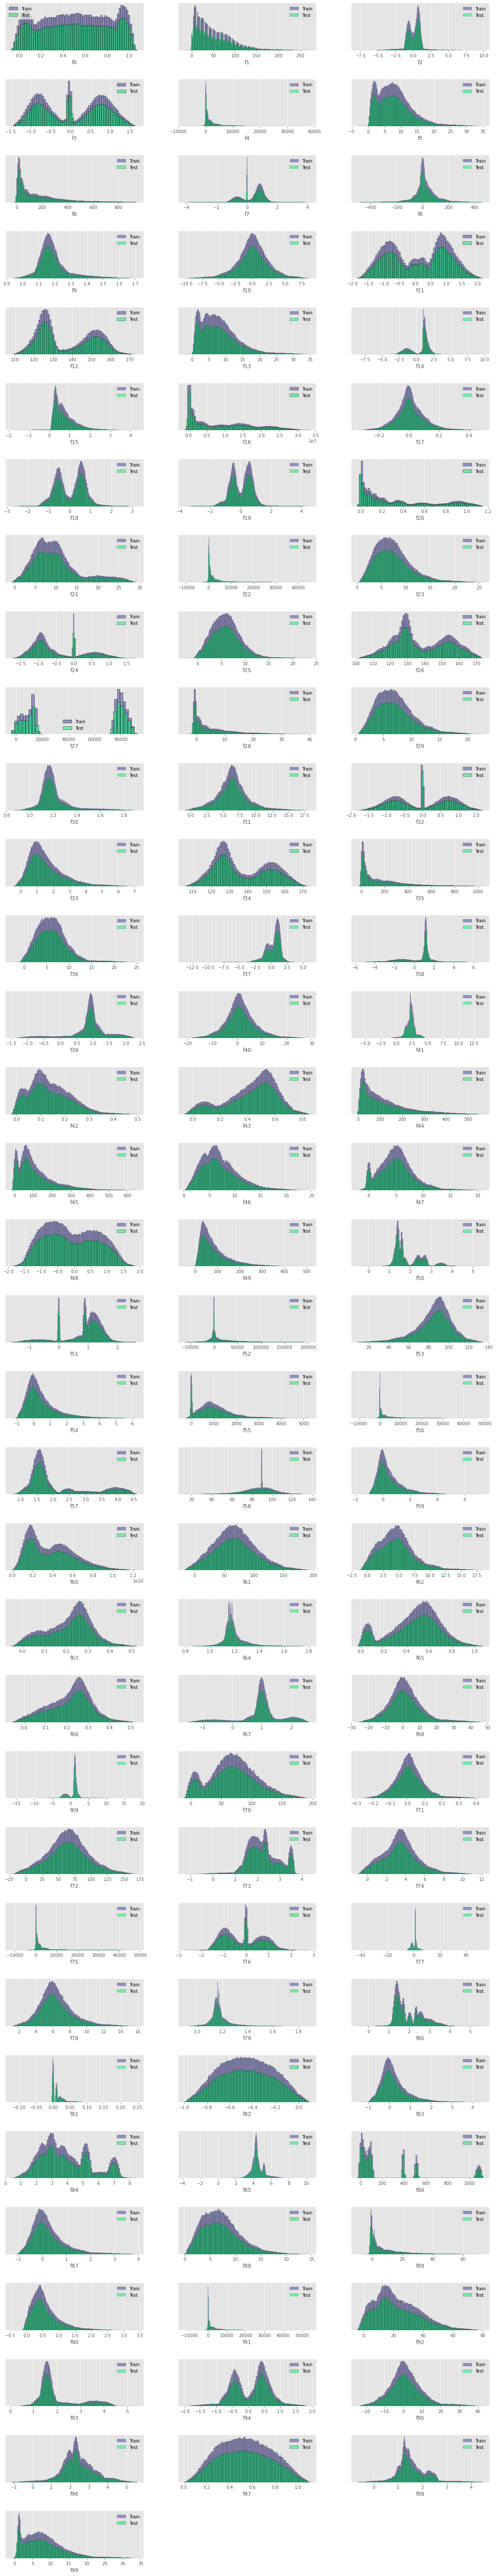

In [35]:
#Each feature distribution
df = pd.concat([df_train.drop(["loss"], axis=1)])
df = df_train.columns[0:100]
plt.subplots(figsize=(20,160))
length = len(df)
for i, j in zip(df, range(length)):
    fig = plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=.25, hspace=.6)
    plt.yticks([])
    sns.histplot(x=df_train[i], alpha=0.5,edgecolor="black",color='#3e3b92')
    sns.histplot(x=df_test[i], alpha=0.5,edgecolor="black",color='#00ee6e')
    fig.legend(labels=('Train','Test'))

## **Data split**

In [36]:
# Separate target from features
x = df_train.drop('loss', axis = 1)
y = df_train.loss

In [40]:
#split the validation sets
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Checking split 
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)
print('X_val:', x_val.shape)
print('y_val:', y_val.shape)

X_train: (200000, 100)
y_train: (200000,)
X_val: (50000, 100)
y_val: (50000,)


In [42]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# Model Training

## **CatBoost**

In [45]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(random_state=42,iterations = 5000,learning_rate=0.005, early_stopping_rounds=50)
cat_model.fit(x_train, y_train, verbose = 0)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

In [47]:
# Metric evaluation
from sklearn.metrics import  mean_squared_error
pred_cat = cat_model.predict(x_val)
print("RMSE: ", np.sqrt(mean_squared_error(y_val, pred_cat)))

RMSE:  7.831348922426766


In [48]:
#Train the whole Dataset
cat_model.fit(x, y, verbose = 0)

In [50]:
#Catboost prediction
y_pred1 = cat_model.predict(df_test)

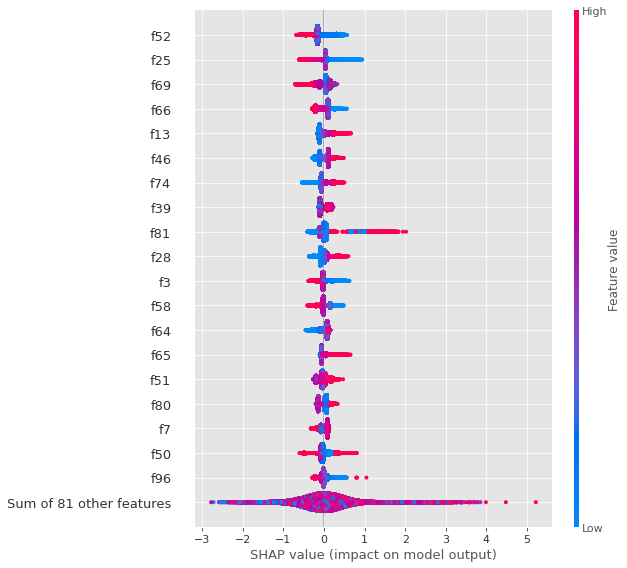

In [52]:
# Feature impact on model
import shap
impact = shap.Explainer(cat_model)
shap_values = impact(x)
shap.plots.beeswarm(shap_values, max_display = 20)

## **LightGBM**

In [53]:
from lightgbm import LGBMRegressor
LGBModel = LGBMRegressor(random_state=42,n_estimators= 500,learning_rate=0.005, objective='regression', max_depth=5, n_jobs = -1)
LGBModel.fit(x, y, verbose = 0)
pred_lgbm = LGBModel.predict(df_test)
print("RMSE", np.sqrt(mean_squared_error(y, LGBModel.predict(x))))

RMSE 7.874304223122942


## **XGBoost**

In [54]:
from xgboost import XGBRegressor
XGBModel = XGBRegressor(random_state=42,n_estimators= 500,learning_rate=0.05,
                      max_depth=8,booster='gbtree',verbosity=0)
XGBModel.fit(x,y)
pred_xgb = XGBModel.predict(df_test)
print("RMSE", np.sqrt(mean_squared_error(y, XGBModel.predict(x))))

RMSE 6.901326785384163


# Ensembling
We are going to take the output of the 3 models and calculate a weighted average of them. Which will improve our results

In [55]:
final_predictions = (0.25 * y_pred1) + (0.25 * pred_lgbm) + (0.5 * pred_xgb)

In [57]:
# Organize submission file
sub['loss'] = final_predictions
sub

,id,loss
0,250000,7.458899
1,250001,5.318393
2,250002,7.536329
3,250003,7.034228
4,250004,7.450203
...,...,...
149995,399995,7.290424
149996,399996,6.603332
149997,399997,6.151941
149998,399998,6.794410


In [58]:
sub.to_csv("submission.csv", index = False)